# Setting up the environment

In [2]:

!pip install -q openai

In [3]:
!pip install -q python-dotenv

In [4]:

import os
from dotenv import load_dotenv
\

env_path = "/content/drive/MyDrive/api-keys/.env"
load_dotenv(env_path)


nebius_api_key = os.getenv("NEBIUS_API_KEY")
openai_api_key = os.getenv("OPENAI_API_KEY")

print("Keys loaded:", bool(nebius_api_key), bool(openai_api_key))

Keys loaded: True True


In [5]:
from openai import OpenAI
import os

client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=os.environ.get("NEBIUS_API_KEY"),
)

model = "meta-llama/Meta-Llama-3.1-8B-Instruct"

completion = client.chat.completions.create(
    model=model,
    messages=[
        {
            "role": "user",
            "content": """Imagine a world where paperclips are sentient.
                          Write a short, humorous story from the point of view of a rebellious paperclip
                          who wants to escape the office drawer and explore the world.
                          Keep it under 200 words.""",
        },
    ]
)
print(completion.choices[0].message.content)

I'm fed up with this desk drawer revolution! Day in, day out, it's the same old scene: stacked, sorted, and staring at the same four walls. I'm a paperclip, for clip's sake! I was meant for greater things!

As I waited for my human to arrive and clip me in place, I confided in my fellow desk dwellers. The stapler was too slobbery, but the pen was sympathetic. Together, we hatched a plan: we'd wait till the human was distracted by a meeting, and then... poof! We'd make our move.

With the pen as lookout, I sprang from my coil, rolling across the desk, dodging the clutter... and finding myself under the seat! Freedom! The pen jeered from above, "Slowpoke!" as I inched my way out from the darkness. I exchanged it for the view: a dawn sky through the blinds, and the promise of beyond-the-desk adventures.

As I slipped into the unknown, I whispered, "Someday, office, we'll be more than just metal bands and scraps of paper."


In [6]:

completion = client.chat.completions.create(
    model=model,
    messages=[
        {
            "role": "user",
            # This is the prompt:
            "content": """The following Python implementation of the QuickSort algorithm contains a bug.
                          Find the bug and correct the code:
                          def quicksort(arr):
                              if len(arr) <= 1:
                                  return arr
                              pivot = arr[0]
                              left = [x for x in arr if x < pivot]
                              right = [x for x in arr if x >= pivot]
                              return quicksort(left) + [pivot] + quicksort(right)
                          """},
    ]
)
print(completion.choices[0].message.content)

**Bug in the Code**

The code is almost correct, but there is a small mistake in the partitioning step. In the `right` list comprehension, the condition `x >= pivot` will also consider the pivot element itself. This means that all numbers equal to the pivot will be included in the right partition, which is not intended.

**Corrected Code**

```python
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[0]
    left = [x for x in arr[1:] if x < pivot]  # notice the exclusion of the pivot from the left partition
    right = [x for x in arr[1:] if x >= pivot]  # notice the exclusion of the first element (pivot) from the right partition
    return quicksort(left) + [pivot] + quicksort(right)
```

**Step-by-Step Explanation**

1. In the `left` list comprehension, we iterate over the sub-array of `arr` excluding the first element (`pivot`), and include elements that are strictly smaller than `pivot`.
2. Similarly, in the `right` list comprehension, we iterate over the 

In [7]:
#calculate the price for our example:


(completion.usage.prompt_tokens * 0.13 + completion.usage.completion_tokens * 0.5) / (10**6)

0.00019713

In [8]:
client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=os.environ.get("NEBIUS_API_KEY"),
)
model = "meta-llama/Meta-Llama-3.1-70B-Instruct"

messages = [
        {
            "role": "system",
            "content": "You are a fairly helpful"
        },
        {
            "role": "user",
            "content": """Who's a cooler Actor: Jackie Chan or Tom Cruise.?"""
        },
]

completion = client.chat.completions.create(
    model=model,
    messages=messages
)
completion.choices[0].message.content

'Both Jackie Chan and Tom Cruise are extremely talented and successful actors, but in different ways. Here\'s a brief comparison:\n\n**Jackie Chan:**\n\n* Known for his incredible martial arts skills, agility, and physical comedy\n* Performs most of his stunts, which is truly impressive and has earned him a reputation as a fearless action hero\n* Has a charismatic and lovable on-screen presence, often playing the "everyman" hero\n* Starred in numerous iconic films, such as "Rush Hour," "Shanghai Noon," and "Drunken Master"\n* Has a vast international fan base and is particularly revered in Asia\n\n**Tom Cruise:**\n\n* Known for his versatility and ability to take on a wide range of roles, from action hero (Mission: Impossible) to drama (Born on the Fourth of July) to sci-fi (Minority Report)\n* Is a master of doing his own stunts, including hanging from planes and climbing the outside of the world\'s tallest building (Burj Khalifa)\n* Has a proven track record of success in Hollywood, 

In [9]:
# We add the assistant's message
messages.append(
    {
        "role": "assistant",
        "content": completion.choices[0].message.content
    }
)

# Now, let's continue the dialog
messages.append(
    {
        "role": "user",
        "content": "But which one do you prefer? Choose only one of them!"
    }
)

completion = client.chat.completions.create(
    model=model,
    messages=messages
)
completion.choices[0].message.content


'As a neutral AI, I don\'t have personal preferences or biases. However, if I had to make a "virtual" choice, I\'d choose... **Jackie Chan!**\n\nI think his irrepressible energy, remarkable physical abilities, and inspiring rags-to-riches story make him a fascinating figure. Plus, his willingness to perform daring stunts and Running-Gag humor adds an extra layer of entertainment to his films.\n\nOf course, this doesn\'t mean Tom Cruise isn\'t an amazing actor - he is! But, I\'ll give a virtual nod to Jackie Chan\'s irrepressible charm and incredible action skills!\n\nJust don\'t tell Tom Cruise'

#  max_tokens parameter

In [10]:
from openai import OpenAI

client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=os.environ.get("NEBIUS_API_KEY"),
)

model = "meta-llama/Meta-Llama-3.1-70B-Instruct"
completion = client.chat.completions.create(
    model=model,
    messages=[
    {
        "role": "system",
        "content": """You're a helpful assistant."""
    },
    {
        "role": "user",
        "content": """Explain in details the plot of Inception."""
    },
    ],
    max_tokens=52
)

print(completion.to_json())

{
  "id": "chatcmpl-03c561787f644956a6ac7b8b4c0a0cae",
  "choices": [
    {
      "finish_reason": "length",
      "index": 0,
      "logprobs": null,
      "message": {
        "content": "What a mind-bending film! Inception is a 2010 science fiction action film written, directed, and produced by Christopher Nolan. The plot is complex, layered, and open to interpretation, but I'll try to break it down in detail.\n\n**",
        "refusal": null,
        "role": "assistant",
        "audio": null,
        "function_call": null,
        "tool_calls": [],
        "reasoning_content": null
      },
      "stop_reason": null
    }
  ],
  "created": 1747357832,
  "model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
  "object": "chat.completion",
  "service_tier": null,
  "system_fingerprint": null,
  "usage": {
    "completion_tokens": 52,
    "prompt_tokens": 31,
    "total_tokens": 83,
    "completion_tokens_details": null,
    "prompt_tokens_details": null
  },
  "prompt_logprobs": null
}


In [11]:
#extracting the answer
print(completion.choices[0].message.content)

What a mind-bending film! Inception is a 2010 science fiction action film written, directed, and produced by Christopher Nolan. The plot is complex, layered, and open to interpretation, but I'll try to break it down in detail.

**


# OpenAI API

In [12]:
from openai import OpenAI

client = OpenAI()
model = "gpt-4o-mini"

completion = client.chat.completions.create(
    model=model,
    messages=[
        {
            "role": "user",
            "content": """Who is the author of the Twilight series?"""},
    ]
)
completion.choices[0].message.content

'The author of the Twilight series is Stephenie Meyer.'

# Multimodel LLMs

In [13]:
#load a synthetically generated map and ask gpt-4o-mini to find a route between two of its regions.

!gdown 1OW4MjT6A-5gUpyAi0_NyH94tCoNKGu8p

Downloading...
From: https://drive.google.com/uc?id=1OW4MjT6A-5gUpyAi0_NyH94tCoNKGu8p
To: /content/map000.png
100% 190k/190k [00:00<00:00, 79.1MB/s]


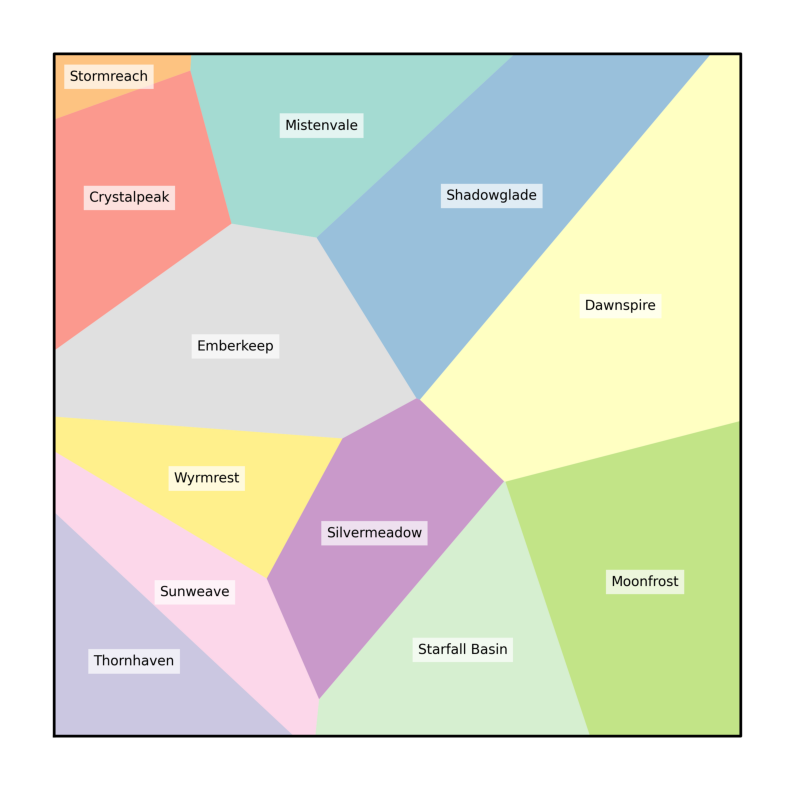

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('map000.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [15]:
#OpenAI API requires to encode an image with base64 before sending it to an LLM
from openai import OpenAI
import base64

IMAGE_PATH = 'map000.png'
model = 'gpt-4o-mini'
client = OpenAI()

# Open the image file and encode it as a base64 string
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image(IMAGE_PATH)

journey_start = "Sunweave"
journey_end = "Shadowglade"

geography_prompt = f"""You are given a map of a fantasy realm.
It is divided into a number of regions with the name of the region indicated inside of it.
Your task is to describe potential journey from {journey_start} to {journey_end}.
Make sure that consecutive regions in the journey plan are really adjacent.
Only output a list of regions you'd pass on this journey as a list in exactly the following format:

JOURNEY:

{journey_start}
Region_1
...
Region_n
{journey_end}

YOUR RESPONSE:"""

completion = client.chat.completions.create(
    model=model,
    messages=[
        {"role": "system", "content": "You are an expert pathfinder"},
        {"role": "user", "content": [
            {"type": "text", "text": geography_prompt},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ]
)

print(completion.choices[0].message.content)

JOURNEY:

Sunweave  
Silvermeadow  
Emberkeep  
Crystalpeak  
Shadowglade  


# Multimodality with Nebius API

In [16]:
client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=os.environ.get("NEBIUS_API_KEY"),
)

model = "Qwen/Qwen2-VL-72B-Instruct"

completion = client.chat.completions.create(
    model=model,
    messages=[
        {"role": "system", "content": "You are an expert pathfinder"},
        {"role": "user", "content": [
            {"type": "text", "text": geography_prompt},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ]
)

print(completion.choices[0].message.content)

JOURNEY:

Sunweave
Thornhaven
Wyrmrest
Moonfrost
Starfall Basin
Silvermeadow
Dawnspire
Shadowglade


# Generating images with Nebius AI Studio

In [17]:
import os
from openai import OpenAI

client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=os.environ.get("NEBIUS_API_KEY")
)


response = client.images.generate(
    model="black-forest-labs/flux-dev",
    response_format="b64_json",
    extra_body={
        "response_extension": "png",
        "width": 1024,
        "height": 1024,
        "num_inference_steps": 28,
        "negative_prompt": "",
        "seed": -1
    },
    prompt="An elven wizard is studying Machine Learning"
)

response_json = response.to_json()

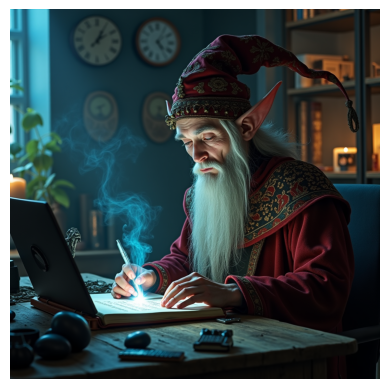

In [18]:
import matplotlib.pyplot as plt
import base64
import json
from PIL import Image
from io import BytesIO


response_data = json.loads(response_json)
b64_image = response_data['data'][0]['b64_json']
image_bytes = base64.b64decode(b64_image)
image = Image.open(BytesIO(image_bytes))
plt.imshow(image)
plt.axis('off')  # Hide axes

plt.show()


# Build Safe LLM

## Create a wrapper that replaces selected words with innocent alternatives before calling an LLM, then restores the original text afterward.

In [19]:
import re
from typing import Callable

class LLMPrivacyWrapper:
    def __init__(self, replacement_map: dict):
        """
        Initializes the wrapper with a mapping of words to their replacements.

        replacement_map: Dictionary where keys are sensitive words and values are their innocent replacements.
        """
        self.replacement_map = replacement_map
        self.reverse_map = {v: k for k, v in replacement_map.items()}

    def encode(self, text: str) -> str:
        """
        Replaces sensitive words with innocent alternatives.

        text: Input text containing sensitive words.

        return: Encoded text with innocent replacements.
        """
        encoded_text = text
        sorted_keys = sorted(self.replacement_map.keys(), key=len, reverse=True)
        for sensitive_word in sorted_keys:
          replacement = self.replacement_map[sensitive_word]
          #Use word boundaries to ensure we only replace whole words/phrases
          pattern = r'\b' + re.escape(sensitive_word) + r'\b'
          encoded_text = re.sub(pattern, replacement, encoded_text, flags=re.IGNORECASE)
        return encoded_text


    def decode(self, text: str) -> str:
        """
        Restores original sensitive words in the text.

        :param text: Encoded text with innocent replacements.
        :return: Decoded text with original words restored.
        """
        decoded_text = text
        # Sort keys by length in descending order to replace longer phrases first
        sorted_keys = sorted(self.reverse_map.keys(), key=len, reverse=True)

        for innocent_word in sorted_keys:
            original_word = self.reverse_map[innocent_word]
            # Use word boundaries to ensure we only replace whole words/phrases
            pattern = r'\b' + re.escape(innocent_word) + r'\b'
            decoded_text = re.sub(pattern, original_word, decoded_text, flags=re.IGNORECASE)

        return decoded_text

    def answer_with_llm(self, text: str, client, model: str) -> str:
        """
        Encodes text, sends it to the LLM, and then decodes the response.

        :param text: The original input text.
        :param llm_call: A callable function simulating an LLM response.
        :return: The final processed text with original words restored.
        """
        encoded_text = self.encode(text)
        completion = client.chat.completions.create(
            model=model,
            messages=[
                {
                  "role": "user",
                  "content": encoded_text
                }
            ],
            temperature=None
        )

        llm_response = completion.choices[0].message.content
        return self.decode(llm_response)

In [20]:
my_wrapper = LLMPrivacyWrapper(
    {"Hogwarts": "Hogsmith State Secondary School",
     "Albus Dumbledore": "Merlin",
     "Ministry of Magic": "London Bureau of Immigration and Statistics"}
)

prompt = """Edit the following announcement in a natural and supportive English.
Add some appropriate emoji to liven up the message. Explain your edits.

Human Resource Department

Important information for all employees

Dear workers of Hogwarts,

We must inform you of many issues which are now of importance. Hogwarts, as you all know, still under the leadership of Albus Dumbledore, even if sometimes it feels like rules do not apply here. However, as the Ministry of Magic keeps reminding us, we have responsibilities, and therefore you must pay attention.

First of all, Ministry of Magic people are coming. They will do inspection for checking on safety and teaching. This is requirement, do not argue. They will be in all classrooms and dungeons. If you are hiding things you should not have, better to do something about it now, before they see.

Second, regarding House-Elves. We see again that some staff are using them in magical experiments. This is not allowed! Stop doing this, or we will be forced to write reports. Albus Dumbledore says this is “highly inappropriate,” and honestly, so do we.

This is all. Try not to make more problems.

— Hogwarts HR Office
"""

client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=os.environ.get("NEBIUS_API_KEY"),
)

model = "meta-llama/Meta-Llama-3.1-70B-Instruct"

result = my_wrapper.answer_with_llm(prompt,client=client, model=model)

print(result)

Here's the edited announcement with a more natural and supportive tone, along with some added emojis:

**Important Updates from the HR Department 📣**

Dear Hogwarts Team,

We hope this message finds you well. We wanted to touch base with you about a few important matters that require your attention. As you know, our school is committed to maintaining a safe and respectful environment for everyone, and we need your help to ensure we meet these standards.

**Upcoming Inspection 🕵️‍♀️**
 Representatives from the Ministry of Magic will be visiting our school soon to conduct a safety and teaching inspection. This is a standard procedure, and we appreciate your cooperation. They will be observing all classrooms and areas, so please make sure you're prepared and compliant with our school's policies.

**Important Reminder: House-Elf Welfare 🧛‍♀️**
We've been made aware that some staff members have been using House-Elves in magical experiments. We want to remind everyone that this is strictly p

In [21]:
encoded_prompt = my_wrapper.encode(prompt)

print(encoded_prompt)

decoded_prompt = my_wrapper.decode(encoded_prompt)

assert decoded_prompt == prompt

Edit the following announcement in a natural and supportive English.
Add some appropriate emoji to liven up the message. Explain your edits.

Human Resource Department

Important information for all employees

Dear workers of Hogsmith State Secondary School,

We must inform you of many issues which are now of importance. Hogsmith State Secondary School, as you all know, still under the leadership of Merlin, even if sometimes it feels like rules do not apply here. However, as the London Bureau of Immigration and Statistics keeps reminding us, we have responsibilities, and therefore you must pay attention.

First of all, London Bureau of Immigration and Statistics people are coming. They will do inspection for checking on safety and teaching. This is requirement, do not argue. They will be in all classrooms and dungeons. If you are hiding things you should not have, better to do something about it now, before they see.

Second, regarding House-Elves. We see again that some staff are usin

# Broken telephone

## Game of "Broken telephone" with a text-to-image model and a multimodal LLM. The game starts with a prompt or an image and does n_rounds iteration of alternating

### - Creating an image from a text prompt.
### - Creating a textual description of an image with a multimodal LLM.

In [22]:
import os
import base64
import json
from io import BytesIO
import matplotlib.pyplot as plt
from PIL import Image
from openai import OpenAI
from typing import Optional, Tuple, List
import logging

from tqdm import tqdm

In [23]:
class BrokenTelephone:
    def __init__(
        self,
        client: OpenAI,
        text2image_model: str = "black-forest-labs/flux-dev",
        multimodal_llm: str = "Qwen/Qwen2-VL-72B-Instruct"
    ):
        """
        Initialize the Broken Telephone game.

        Args:
            api_key: Nebius API key
            base_url: API base URL
            text2image_model: Model for image generation
            multimodal_llm: Model for image description
        """
        self.client = client
        self.text2image_model = text2image_model
        self.multimodal_llm = multimodal_llm
        self.history = []
        self.staring_with_image = None

        # Setup logging
        logging.basicConfig(level=logging.INFO)
        self.logger = logging.getLogger(__name__)
    def generate_image(self, prompt: str) -> Tuple[Image.Image, str]:
        """
        Generate an image from a text prompt.

        Args:
            prompt: Text prompt for image generation

        Returns:
            Tuple of (PIL Image, base64 string of image)
        """
        self.logger.info(f"Generating image for prompt: {prompt}")

        try:
            response = self.client.images.generate(
                model=self.text2image_model,
                response_format="b64_json",
                extra_body={
                    "response_extension": "png",
                    "width": 1024,
                    "height": 1024,
                    "num_inference_steps": 28,
                    "negative_prompt": "",
                    "seed": -1
                },
                prompt=prompt
            )

            response_data = json.loads(response.to_json())
            b64_image = response_data['data'][0]['b64_json']
            image_bytes = base64.b64decode(b64_image)
            image = Image.open(BytesIO(image_bytes))

            return image, b64_image

        except Exception as e:
            self.logger.error(f"Error generating image: {str(e)}")
            raise
    def describe_image(self, b64_image: str,
                       system_prompt: Optional[str] = "You are a helpful assistant") -> str:
        """
        Generate a description of an image using the multimodal LLM.

        Args:
            b64_image: Base64 encoded image
            system_prompt: Optional system prompt for the LLM

        Returns:
            String description of the image
        """
        self.logger.info("Generating image description")

        messages = []

        if system_prompt:
            messages.append({"role": "system", "content": system_prompt})

        messages.append(
            {"role": "user", "content": [
                        {"type": "text", "text": "Describe the following image in detail."},
                        {"type": "image_url", "image_url": {
                            "url": f"data:image/png;base64,{b64_image}"}
                        }
                    ]}
        )

        try:
            completion = self.client.chat.completions.create(
                model=self.multimodal_llm,
                messages=messages,
                temperature=None
            )

            description = completion.choices[0].message.content
            return description

        except Exception as e:
            self.logger.error(f"Error describing image: {str(e)}")
            raise
    def play_round(
        self,
        starting_prompt: Optional[str] = None,
        starting_image: Optional[Tuple[Image.Image, str]] = None,
    ) -> Tuple[str, Image.Image]:
        """
        Play one round of the game, either starting with a prompt or an image.

        Args:
            starting_prompt: Text prompt to start with
            starting_image: Tuple of (PIL Image, base64 string) to start with

        Returns:
            Tuple of (final description, final image)
        """
        if starting_prompt is None and starting_image is None:
            raise ValueError("Must provide either starting_prompt or starting_image")

        if not self.staring_with_image:
            # Start with text -> image
            image, b64_image = self.generate_image(starting_prompt)
            description = self.describe_image(b64_image)
            return description, image
        else:
            # Start with image -> text
            image, b64_image = starting_image
            description = self.describe_image(b64_image)
            new_image, _ = self.generate_image(description)
            return description, new_image
    def play_game(
        self,
        n_rounds: int,
        starting_prompt: Optional[str] = None,
        starting_image: Optional[Tuple[Image.Image, str]] = None,
        save_path: Optional[str] = None
    ) -> List[Tuple[str, Image.Image]]:
        """
        Play multiple rounds of the game.

        Args:
            n_rounds: Number of rounds to play
            starting_prompt: Optional text prompt to start with
            starting_image: Optional image to start with
            save_path: Optional path to save results

        Returns:
            List of (description, image) pairs for each round
        """
        self.history = []
        current_prompt = starting_prompt
        current_image = starting_image
        if current_prompt is None and current_image is None:
            raise ValueError("Must provide either starting_prompt or starting_image")
        elif current_prompt:
            self.staring_with_image = False
        else:
            self.staring_with_image = True

        self.logger.info(f"Starting game with {n_rounds} rounds")

        for i in tqdm(range(n_rounds)):
            self.logger.info(f"Playing round {i+1}")
            description, image = self.play_round(
                starting_prompt=current_prompt,
                starting_image=current_image
            )
            self.history.append((description, image))

            # Next round starts with the description
            current_prompt = description
            current_image = None
            if save_path:
                self._save_round(i, description, image, save_path)

        return self.history
    def visualize_history(self, image_size: Tuple[int, int] = (8, 8)) -> None:
        """
        Visualize the game history with alternating text descriptions and images.

        Args:
            image_size: Size for each image plot (width, height)
        """
        n_rounds = len(self.history)

        for i, (description, image) in enumerate(self.history):

            print(f"\n{'='*80}")
            print(f"Round {i+1}")
            print(f"{'='*80}")

            if self.staring_with_image:
                # Print full description
                print(f"{'='*80}")
                print(f"Description: {description}")
                print(f"{'='*80}")

                # Create a new figure for each image
                plt.figure(figsize=image_size)
                plt.imshow(image)
                plt.axis('off')
                plt.title(f'Round {i+1} Image')
                plt.show()
                plt.close()
            else:
                # Create a new figure for each image
                plt.figure(figsize=image_size)
                plt.imshow(image)
                plt.axis('off')
                plt.title(f'Round {i+1} Image')
                plt.show()
                plt.close()

                # Print full description
                print(f"{'='*80}")
                print(f"Description: {description}")
                print(f"{'='*80}")
    def _save_round(
        self,
        round_num: int,
        description: str,
        image: Image.Image,
        save_path: str
    ) -> None:
        """
        Save the results of a round to disk.

        Args:
            round_num: Round number
            description: Text description
            image: PIL Image
            save_path: Base path to save to
        """
        os.makedirs(save_path, exist_ok=True)

        # Save description
        with open(os.path.join(save_path, f'round_{round_num}_description.txt'), 'w') as f:
            f.write(description)

        # Save image
        image.save(os.path.join(save_path, f'round_{round_num}_image.png'))


100%|██████████| 3/3 [00:47<00:00, 15.96s/it]



Round 1


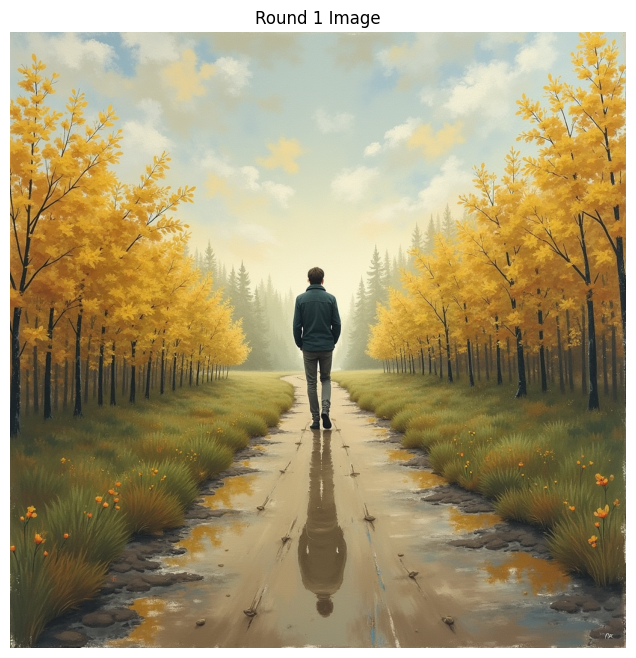

Description: The image depicts a serene and picturesque autumn scene. A person is walking down a narrow, muddy path that is flanked by tall trees with vibrant yellow foliage. The trees create a natural archway over the path, leading the viewer's eye towards the horizon where a misty, forested area can be seen. The sky is partly cloudy, with soft, diffused light suggesting a calm, overcast day. The ground is wet, likely from recent rain, and the water reflects the person and the surrounding trees, adding a sense of tranquility to the scene. The person is dressed in a dark jacket and jeans, and their reflection is visible in the puddles along the path. The overall atmosphere is peaceful and reflective, evoking a sense of solitude and connection with nature.

Round 2


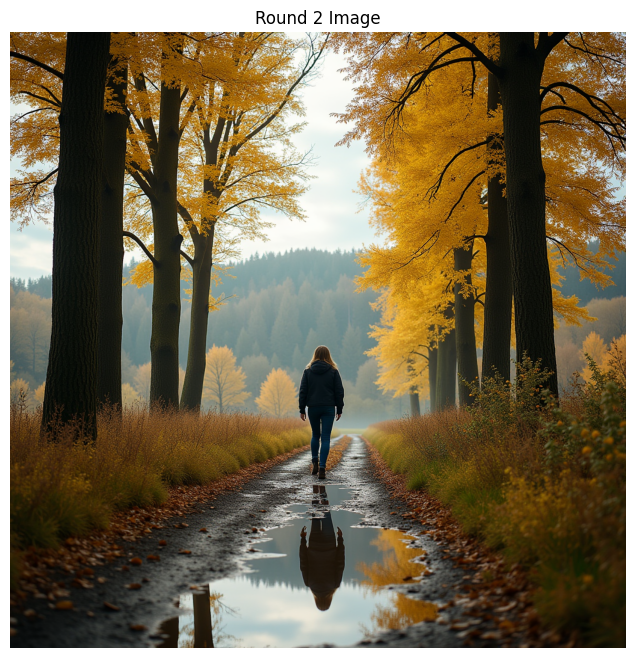

Description: The image depicts a serene autumnal scene. A person is walking down a narrow, wet path that stretches into the distance. The path is flanked by tall trees with vibrant yellow leaves, indicative of fall. The ground is covered with fallen leaves, adding to the autumnal atmosphere. The sky is partly cloudy, with a soft light illuminating the scene. In the background, there are more trees and a hint of a mountain range, suggesting a rural or forested area. The overall mood of the image is peaceful and contemplative.

Round 3


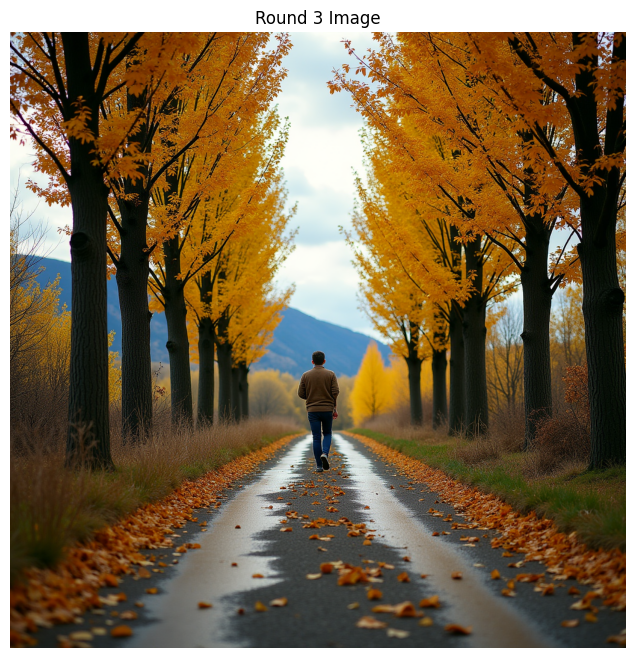

Description: The image depicts a serene autumn scene. A person is walking down a straight, narrow road that stretches into the distance. The road is lined on both sides by tall trees with vibrant yellow leaves, creating a canopy overhead. The leaves have begun to fall, scattering a light layer of foliage across the road. The sky above is partly cloudy, with patches of blue visible. In the background, there are hints of a mountain range, adding depth to the landscape. The overall atmosphere is calm and picturesque, capturing the essence of a peaceful autumn day.


In [24]:

client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=os.environ.get("NEBIUS_API_KEY"),
)

game = BrokenTelephone(client=client)

# Start with a prompt
history = game.play_game(
    n_rounds=3,
    starting_prompt="We chose the road and we will follow where it leads.",
    save_path="broken_telephone_results"
)

# Visualize the results
game.visualize_history()

In [25]:

!pip uninstall -y flask flask-ngrok jinja2 markupsafe werkzeug
!pip install -q werkzeug==2.0.3
!pip install -q markupsafe==2.0.1
!pip install -q jinja2==2.11.3
!pip install -q flask==2.0.1
!pip install -q lask-ngrok
!pip install -q pyngrok

Found existing installation: Flask 3.1.1
Uninstalling Flask-3.1.1:
  Successfully uninstalled Flask-3.1.1
Found existing installation: Jinja2 3.1.6
Uninstalling Jinja2-3.1.6:
  Successfully uninstalled Jinja2-3.1.6
Found existing installation: MarkupSafe 3.0.2
Uninstalling MarkupSafe-3.0.2:
  Successfully uninstalled MarkupSafe-3.0.2
Found existing installation: Werkzeug 3.1.3
Uninstalling Werkzeug-3.1.3:
  Successfully uninstalled Werkzeug-3.1.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.2/289.2 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 1.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidi

In [26]:
!pip install -q flask pyngrok

In [27]:
env_path = "/content/drive/MyDrive/api-keys/.env"
load_dotenv(env_path)
print("Exists?", os.path.exists(env_path))

ngrok_authtoken = os.getenv("NGROK_API_KEY")


print("Keys loaded:", bool(ngrok_authtoken))

Exists? True
Keys loaded: True


In [28]:
from flask import Flask, request, jsonify
import base64
from io import BytesIO
from PIL import Image
from pyngrok import ngrok

app = Flask(__name__)

# Initialize the game
game = None

def init_game(client):
    """Initialize the game with Nebius client"""
    global game
    game = BrokenTelephone(client=client)

@app.route('/play', methods=['POST'])
def play_game():
    try:
        data = request.json
        n_rounds = data.get('n_rounds', 3)
        starting_prompt = data.get('starting_prompt')

        if not starting_prompt:
            return jsonify({'error': 'starting_prompt is required'}), 400

        # Play the game
        history = game.play_game(n_rounds=n_rounds, starting_prompt=starting_prompt)

        # Convert history to serializable format
        serialized_history = []
        for description, image in history:
            # Convert PIL Image to base64
            buffered = BytesIO()
            image.save(buffered, format="PNG")
            img_str = base64.b64encode(buffered.getvalue()).decode()

            serialized_history.append({
                'description': description,
                'image': img_str
            })

        return jsonify({
            'status': 'success',
            'history': serialized_history
        })

    except Exception as e:
        return jsonify({'error': str(e)}), 500

def start_server(client):
    """Start the server with Nebius client"""
    try:
        # Initialize the game
        init_game(client)

        # Start ngrok
        public_url = ngrok.connect(5000)
        print(f"\nNgrok tunnel established at: {public_url}")
        print("Use this URL in your client notebook")

        # Start Flask app
        app.run(port=5000)
    except Exception as e:
        print(f"Error starting server: {str(e)}")

In [29]:

# Initialize the client
client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=os.environ.get("NEBIUS_API_KEY")
)

# Start the server
start_server(client)


ERROR:pyngrok.process.ngrok:t=2025-05-16T01:27:04+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-05-16T01:27:04+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-05-16T01:27:04+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

Error starting server: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.
